<a href="https://colab.research.google.com/github/sixth-group/project2/blob/main/Copy_of_Vision.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Downloading Train Dataset
using `!gdown` to download the data and unzip it with `!unzip`. Then delete the zip file using `!gdown`

In [3]:
!gdown 1-7ljOXuzdIeXTCRuxZFGH2Sg3IanH-WJ
# https://drive.google.com/file/d/1-7ljOXuzdIeXTCRuxZFGH2Sg3IanH-WJ/view?usp=sharing
!unzip train_data.zip
%rm train_data.zip

Streaming output truncated to the last 5000 lines.
  inflating: train_data/10/fac187c69fc74a48d28e626bd17fe5b0d36db1e6_1618836534.jpg  
  inflating: train_data/10/9a9f9ff4d3dcfc88e6b9209178d4ee791142fdaa_1618725283.jpg  
  inflating: train_data/10/958281d27ab722113c92180afe17db62bfb6a5d0_1623743398.jpg  
  inflating: train_data/10/8a94fada61bcb6dda8983dc36ddf2ec5d32cbf9f_1629199040.jpg  
  inflating: train_data/10/d72c1b799a927514b1fd81d9ee93208734be4d61_1613975034.jpg  
  inflating: train_data/10/6550a6492a93a9542b7757c898369f7996bb62b7_1613978514.jpg  
  inflating: train_data/10/3465c07dc8a3521f0303cec03ebbc4ac2d738317_1630174913.jpg  
  inflating: train_data/10/74a657eb2f8bc1a9bcd42fee32d04b1a400fcddf_1627746721.jpg  
  inflating: train_data/10/387c4a5ef5d37c263ebe457a2aab08890da843ca_1620800188.jpg  
  inflating: train_data/10/01330eb299562e0e10bdc560e7ed12754f49703b_1621081068.jpg  
  inflating: train_data/10/1ea75672aea3496a099cc3c8d8e2c01306456a52_1619644153.jpg  
  inflating: t

In [2]:
# rm -rf train_data/

## Read Data
This code sets up ImageDataGenerators for training and validation data, and uses them to generate batches of data from a specified directory.

In [4]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense
from tensorflow.keras.applications import EfficientNetV2L

In [5]:
# Set up the directory paths
train_data_dir = '/content/train_data'
input_size = (480, 480)

# Create an ImageDataGenerator for both training and validation data
train_data_generator = ImageDataGenerator(vertical_flip=True,
                                         horizontal_flip=True,
                                         width_shift_range=0.2,
                                         height_shift_range=0.2,
                                         validation_split=0.2)

valid_data_generator = ImageDataGenerator(validation_split=0.2)

# Use flow_from_directory to generate batches of data
train_generator = train_data_generator.flow_from_directory(
    train_data_dir,
    target_size=input_size,
    batch_size=64,
    class_mode='categorical',
    subset='training',
    seed=22,
    shuffle=True
)

validation_generator = valid_data_generator.flow_from_directory(
    train_data_dir,
    target_size=input_size,
    batch_size=64,
    class_mode='categorical',
    subset='validation',
    seed=22,
    shuffle=False
)

Found 7994 images belonging to 10 classes.
Found 1996 images belonging to 10 classes.


## Show not proccessed Data
This code randomly selects 25 images from a training dataset, and displays them in a 5x5 grid along with their class labels

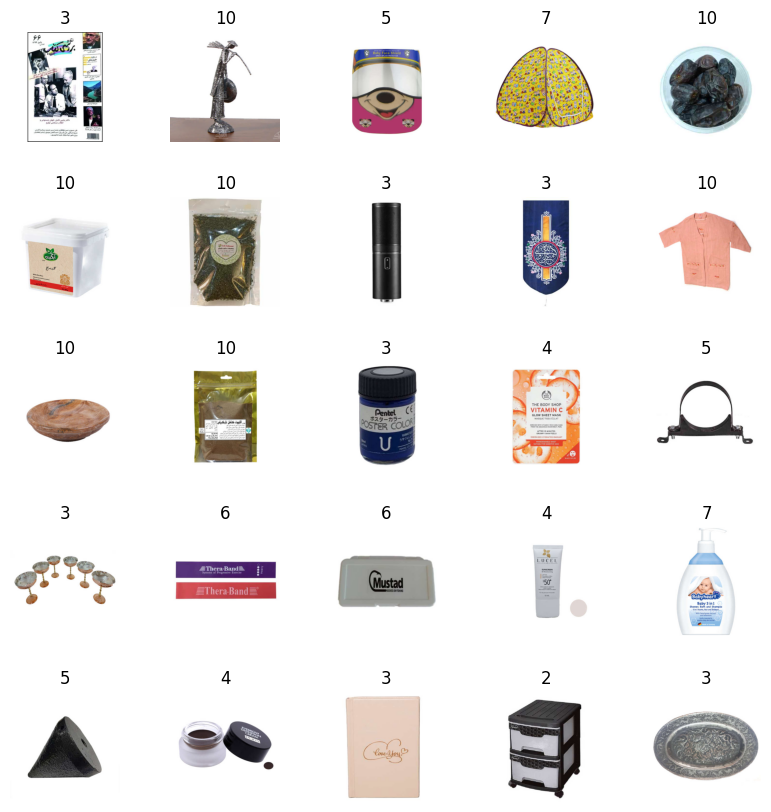

In [6]:
import os
import random
import matplotlib.pyplot as plt

# Set up the directory paths
train_data_dir = '/content/train_data'

# Get the class names
class_names = sorted(os.listdir(train_data_dir))

# Select 25 random images
random_images = []
for _ in range(25):
    class_name = random.choice(class_names)
    class_dir = os.path.join(train_data_dir, class_name)
    image_files = os.listdir(class_dir)
    random_image = random.choice(image_files)
    random_images.append((class_name, random_image))

# Display the random images with class labels in a 5x5 grid
fig, axes = plt.subplots(5, 5, figsize=(10, 10))
fig.subplots_adjust(hspace=0.5)

for i, (class_name, image_file) in enumerate(random_images):
    image_path = os.path.join(train_data_dir, class_name, image_file)
    image = plt.imread(image_path)
    row = i // 5
    col = i % 5
    axes[row, col].imshow(image)
    axes[row, col].set_title(class_name)
    axes[row, col].axis('off')

plt.show()

## Train data
This code loads a pre-trained EfficientNetV2 model, freezes its layers to retain the learned features, adds a custom head to adapt it to a new task, compiles the model with an optimizer and loss function, and then trains the model on a dataset.


In [11]:
# Load the pre-trained EfficientNetV2 model
base_model = EfficientNetV2L(include_top=False, weights='imagenet', input_shape=(480, 480, 3), include_preprocessing=True)

# Freeze the layers of the pre-trained model
for layer in base_model.layers:
    layer.trainable = False

# Add a custom head to the pre-trained model
model = Sequential()
model.add(base_model)
model.add(GlobalAveragePooling2D())
model.add(Dense(1024, activation='relu'))
model.add(Dense(512, activation='relu'))
model.add(Dense(256, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(10, activation='softmax'))  # Assuming you have 10 classes

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
model.fit(train_generator, epochs=10, validation_data=validation_generator)

473176280/473176280 [==============================] - 15s 0us/step
Epoch 1/10
125/125 [==============================] - 834s 6s/step - loss: 1.4447 - accuracy: 0.5175 - val_loss: 1.1598 - val_accuracy: 0.6097
Epoch 2/10
125/125 [==============================] - 738s 6s/step - loss: 1.1223 - accuracy: 0.6212 - val_loss: 1.0838 - val_accuracy: 0.6388
Epoch 3/10
125/125 [==============================] - 737s 6s/step - loss: 0.9674 - accuracy: 0.6761 - val_loss: 1.0767 - val_accuracy: 0.6443
Epoch 4/10
125/125 [==============================] - 754s 6s/step - loss: 0.8554 - accuracy: 0.7110 - val_loss: 1.0127 - val_accuracy: 0.6668
Epoch 5/10
125/125 [==============================] - 752s 6s/step - loss: 0.7454 - accuracy: 0.7482 - val_loss: 1.0785 - val_accuracy: 0.6543
Epoch 6/10
125/125 [==============================] - 754s 6s/step - loss: 0.6572 - accuracy: 0.7755 - val_loss: 1.1129 - val_accuracy: 0.6608
Epoch 7/10
125/125 [==============================] - 741s 6s/step - loss:

## After proccess
here we plot and picture some images after our process

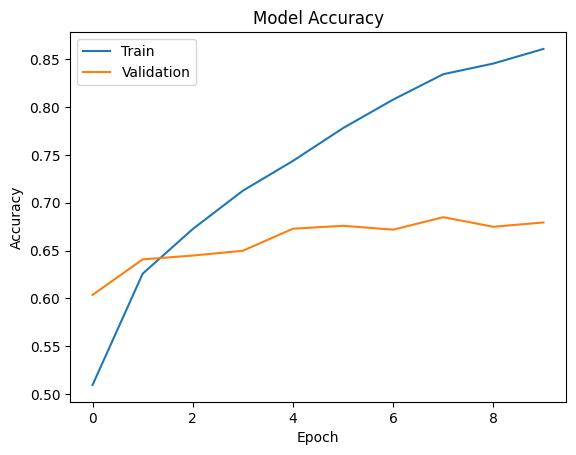

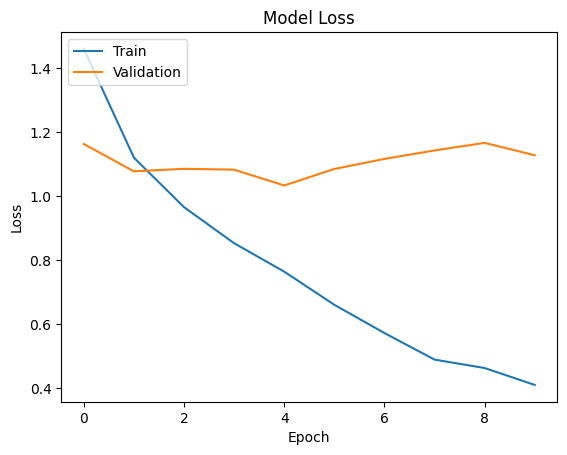

32/32 [==============================] - 113s 3s/step - loss: 1.1275 - accuracy: 0.6794
Validation Loss: 1.1275
Validation Accuracy: 0.6794


In [ ]:
import matplotlib.pyplot as plt

# Visualize training and validation accuracy
plt.plot(model.history.history['accuracy'])
plt.plot(model.history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

# Visualize training and validation loss
plt.plot(model.history.history['loss'])
plt.plot(model.history.history['val_loss'])
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

# Evaluate the model on the validation set
validation_loss, validation_accuracy = model.evaluate(validation_generator)
print(f"Validation Loss: {validation_loss:.4f}")
print(f"Validation Accuracy: {validation_accuracy:.4f}")

2/2 [==============================] - 3s 2s/step


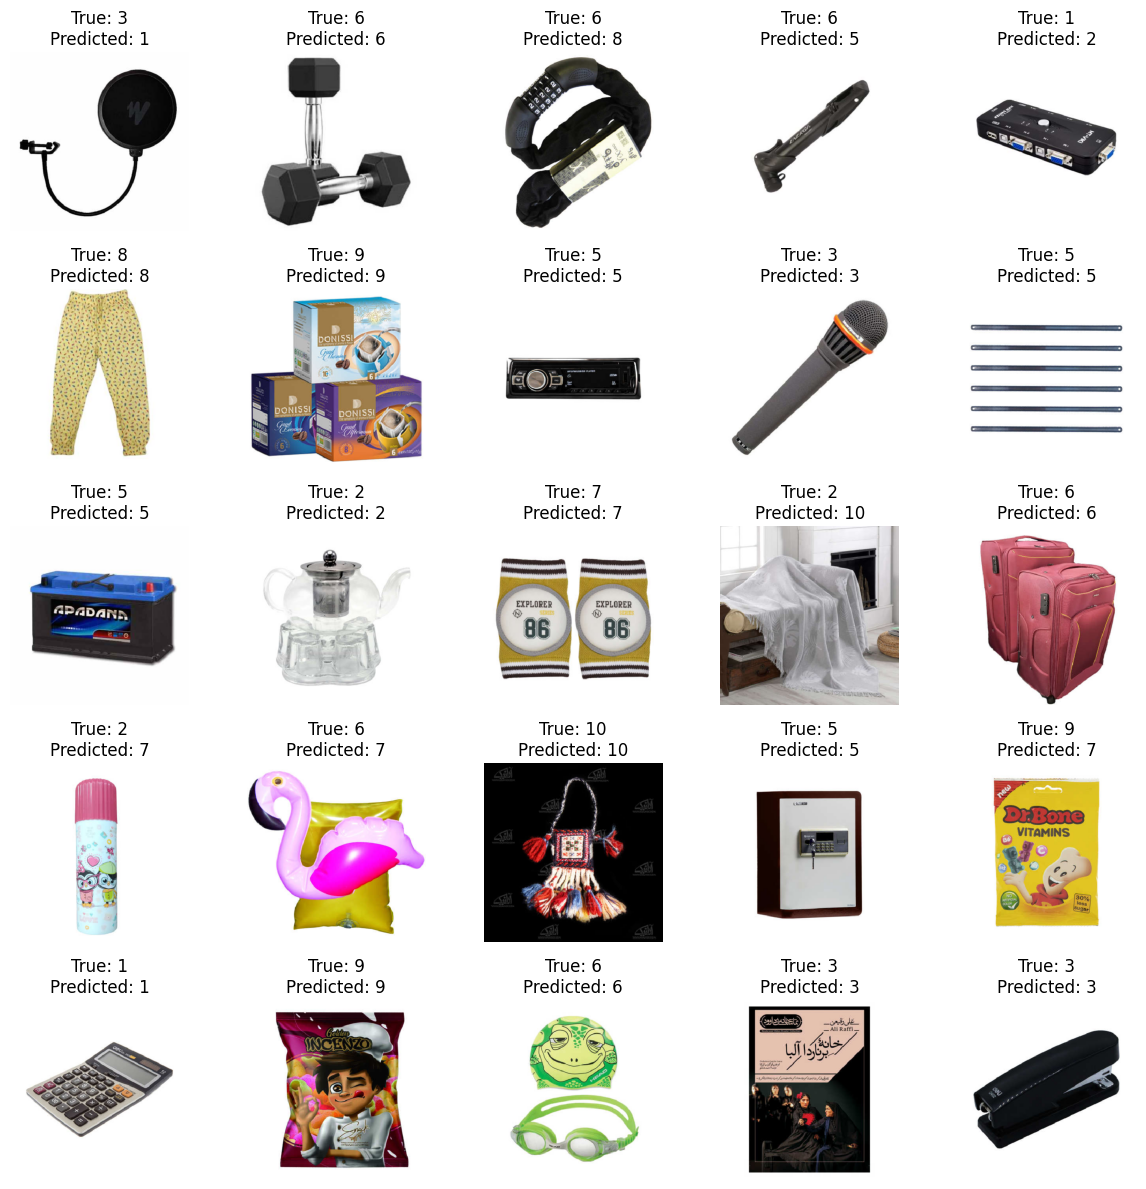

In [ ]:
import numpy as np

# Get a batch of images and labels from the validation generator
images, labels = validation_generator.next()

# Make predictions on the batch of images
predictions = model.predict(images)
predicted_classes = np.argmax(predictions, axis=1)

# Get the class labels
class_labels = list(validation_generator.class_indices.keys())

# Visualize the images and compare the predictions
fig, axes = plt.subplots(nrows=5, ncols=5, figsize=(12, 12))
for i, ax in enumerate(axes.flatten()):
    # Normalize the image pixel values to the range [0, 1]
    normalized_image = images[i] / 255.0

    # Display the image
    ax.imshow(normalized_image)
    ax.axis('off')

    # Get the true and predicted class labels
    true_label = class_labels[np.argmax(labels[i])]
    predicted_label = class_labels[predicted_classes[i]]

    # Set the title with the true and predicted labels
    ax.set_title(f'True: {true_label}\nPredicted: {predicted_label}')

plt.tight_layout()
plt.show()

In [15]:
model.save('/content/saved_model')

In [16]:
from google.colab import drive
drive.mount('/content/saved_model')

ValueError: ignored

In [13]:
!gdown 1-5xCKnZ7N7X6m0pBV1yZDoTmJjAQpttF
# https://drive.google.com/file/d/1-5xCKnZ7N7X6m0pBV1yZDoTmJjAQpttF/view?usp=sharing
!unzip test_data.zip
%rm test_data.zip

Downloading...
From: https://drive.google.com/uc?id=1-5xCKnZ7N7X6m0pBV1yZDoTmJjAQpttF
To: /content/test_data.zip
100% 73.0M/73.0M [00:00<00:00, 110MB/s] 
Archive:  test_data.zip
   creating: test_data/
  inflating: test_data/48b9be75f476e4a7abcab8ae4d71ba540723eb23_1627104677.jpg  
  inflating: test_data/022c70192bc24ddbe4f9696cee51a36cb2a33bc6_1619283435.jpg  
  inflating: test_data/e94bc3bb4e40fda9419663d047b055e9c16997b2_1625578343.jpg  
  inflating: test_data/bb78e3f0c2361e46270c42b7719b70994ee2c996_1626547468.jpg  
  inflating: test_data/595d6a92ea6891c2a15f719ed7735b60acc092dc_1614379609.jpg  
  inflating: test_data/a93d298e6b8d71b7be94ab95c79272cc18be4147_1628685962.jpg  
  inflating: test_data/010e4f7ee159adce2316fc190cc2c1b98e6656a8_1622463808.jpg  
  inflating: test_data/d6e4c24eeb3ced9b103996022d58bc930ad09e39_1611994405.jpg  
  inflating: test_data/521b7a8d476c74cbf1fc2d6bf1bcc327ebba316e_1630428100.jpg  
  inflating: test_data/9ff4c2e054435d5bc784fc2b481680db27fd5cdb_16302

In [ ]:
import os
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.efficientnet import preprocess_input
import numpy as np

# Directory where your test data is located
test_data_dir = '/content/test_data'

# List to store the preprocessed images
images = []

# List to store the filenames
filenames = []

# Iterate over each image in the test data directory
for filename in os.listdir(test_data_dir):
    # Load the image
    img = image.load_img(os.path.join(test_data_dir, filename), target_size=input_size)

    # Convert the image to a numpy array
    img_array = image.img_to_array(img)

    # Expand the dimensions of the image
    img_array = np.expand_dims(img_array, axis=0)

    # Preprocess the image
    img_array = preprocess_input(img_array)

    # Add the preprocessed image to the list of images
    images.append(img_array)

    # Add the filename to the list of filenames
    filenames.append(filename)

# Convert the list of images to a single numpy array
images = np.vstack(images)

# Use the model to predict the labels of the test data
predictions = model.predict(images)

# The predictions are probabilities for each class. To convert these probabilities into actual class predictions, you can use argmax
predicted_classes = np.argmax(predictions, axis=1)


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
import pandas as pd

# Get the filenames from the generator
filenames = test_generator.filenames

# Create a DataFrame with filenames and predicted classes
df = pd.DataFrame({
    'name': filenames,
    'predicted': predicted_classes
})

# Save the DataFrame to a CSV file
df.to_csv('q1_submission.csv', index=False)